In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
data_dir = r"C:\Users\rachel.hassall\OneDrive - National Grid\GitHub\christmas_jamboree\data"

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Explore Historic Chart Performance

In [2]:
# import christmas number 1s specifically
df_xmas = pd.read_csv(os.path.join(data_dir, "Christmas Number 1s/All_xmas_no1s.csv"))
df_xmas = df_xmas.drop("Unnamed: 0", axis=1)
df_xmas = df_xmas.rename({"YEAR" : "ChartYear", "TITLE" : "Song", "ARTIST" : "Artist"}, axis=1)
df_xmas["ChartDate"] = pd.to_datetime(df_xmas.ChartYear.astype(str) + "/12/25",format='%Y/%m/%d')
df_xmas["CHRISTMAS"] = True
df_xmas["Pos"]=1
df_xmas.head()

,ChartYear,Song,Artist,ChartDate,CHRISTMAS,Pos
0,1952,HERE IN MY HEART,AL MARTINO,1952-12-25,True,1
1,1953,ANSWER ME,FRANKIE LAINE,1953-12-25,True,1
2,1954,LET'S HAVE ANOTHER PARTY,WINIFRED ATWELL,1954-12-25,True,1
3,1955,CHRISTMAS ALPHABET,DICKIE VALENTINE,1955-12-25,True,1
4,1956,JUST WALKIN' IN THE RAIN,JOHNNIE RAY,1956-12-25,True,1


In [3]:
# import all chart data
df = pd.read_csv(os.path.join(data_dir, "Charts/singles_2009_2020_latest.csv"))
df["ChartDate"] = pd.to_datetime(df["ChartDate"], format="%d/%m/%Y")

df = pd.concat([df, df_xmas], axis=0)



df['SEASON'] = (df['ChartDate'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df['SEASON_NAME'] = df['SEASON'].map(seasons)

df["ARTIST_AND_SONG"] = df["Artist"] + " - " + df["Song"]

df["ChartYear"] = df["ChartDate"].dt.year
df["ChartMonth"] = df["ChartDate"].dt.month
df["ChartDay"] = df["ChartDate"].dt.day

df["CHRISTMAS"] = df["CHRISTMAS"].fillna(False)

In [148]:
# artists with more than one hit in the top 10 in the charts charts
superartists = df[df["PeakPos"]<10].groupby(["Artist", "Song"]).size().reset_index().rename(columns={0:'count'})["Artist"].value_counts()
superartists = list(superartists[superartists>1].index)

df["SUPERARTIST"] = df["Artist"].isin(superartists)

In [149]:
df_num = df.replace("New", np.nan).replace("Re", np.nan)
df_num["LW"] = df_num["LW"].astype(float)

## how does being a super artist affect your best position?

In [177]:
df.groupby(["SUPERARTIST"])["PeakPos"].mean()

SUPERARTIST
False    24.43256
True     14.30491
Name: PeakPos, dtype: float64

In [178]:
df.groupby(["SUPERARTIST"])["PeakPos"].std()

SUPERARTIST
False    25.731432
True     20.264317
Name: PeakPos, dtype: float64

## correlations

In general, there's a correlation between last weeks position and this weeks position. Makes sense and aligns with general time series behaviour.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


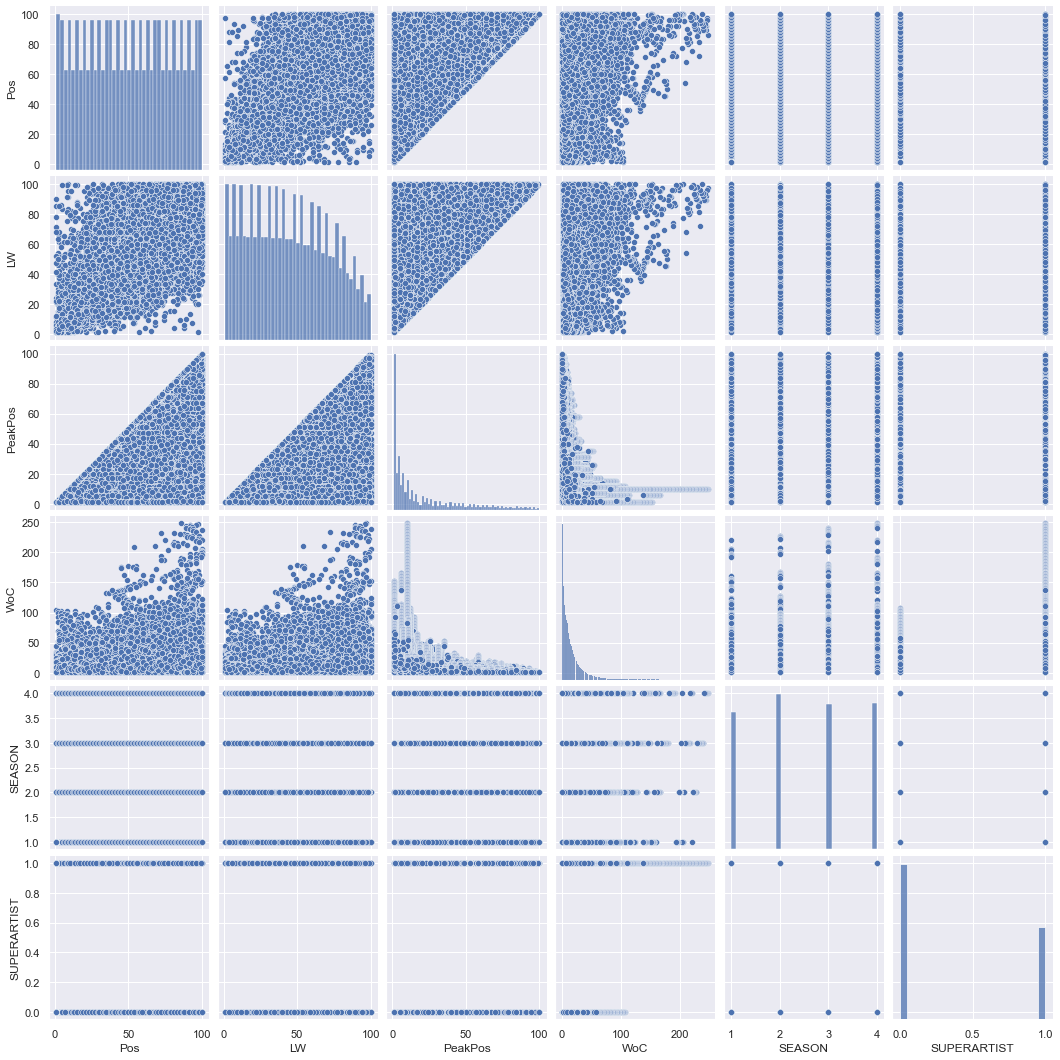

In [180]:
sns.pairplot(df_num[['Pos', 'LW', 'PeakPos', 'WoC', 'SEASON', 'SUPERARTIST']])

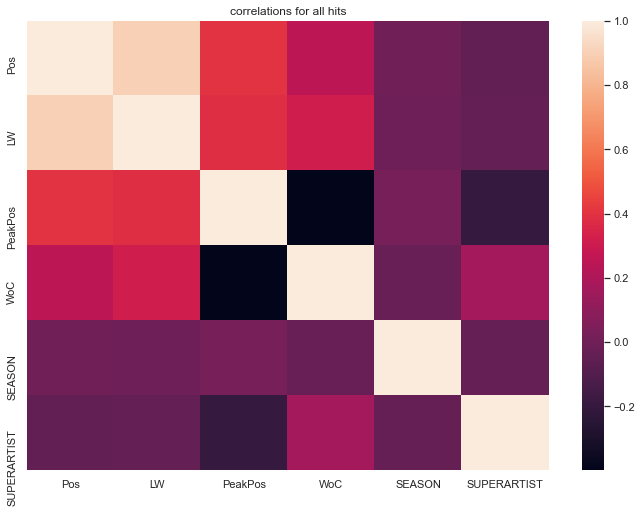

In [151]:
sns.heatmap(df_num[['Pos', 'LW', 'PeakPos', 'WoC', 'SEASON', 'SUPERARTIST']].corr())
plt.title("correlations for all hits")
plt.show()

In [152]:
df_num[['Pos', 'LW', 'PeakPos', 'WoC', 'SEASON', 'SUPERARTIST']].corr()

,Pos,LW,PeakPos,WoC,SEASON,SUPERARTIST
Pos,1.000000,0.896486,0.402443,0.252428,0.002810,-0.045674
LW,0.896486,1.000000,0.385992,0.319911,-0.003446,-0.036990
PeakPos,0.402443,0.385992,1.000000,-0.399570,0.022766,-0.201116
WoC,0.252428,0.319911,-0.399570,1.000000,-0.024176,0.164604
SEASON,0.002810,-0.003446,0.022766,-0.024176,1.000000,-0.031901
SUPERARTIST,-0.045674,-0.036990,-0.201116,0.164604,-0.031901,1.000000


Christmas number 1s however seem to be a lot of new entries in the last few years...

In [11]:
for index, row in df[(df["CHRISTMAS"])&(df["ChartYear"]>2009)].iterrows():
    christmasdate = row["ChartDate"]
    artistsong = row["ARTIST_AND_SONG"]
    
    latestdate = df[(df["ChartDate"]<christmasdate)&(df["ARTIST_AND_SONG"]==artistsong)]["ChartDate"].max()
    
    lastpos = df[(df["ChartDate"]==latestdate)&(df["ARTIST_AND_SONG"]==artistsong)]
    
    if len(lastpos)==0:
        lastpos=np.nan
    else:
        lastpos = lastpos["Pos"]
    
    df.iloc[index]["Pos"] = lastpos
    
    print(christmasdate, latestdate)
    print(lastpos)

2010-12-25 00:00:00 2010-12-20 00:00:00
51500    1
Name: Pos, dtype: int64
2011-12-25 00:00:00 NaT
nan
2012-12-25 00:00:00 NaT
nan
2013-12-25 00:00:00 NaT
nan
2014-12-25 00:00:00 NaT
nan
2015-12-25 00:00:00 NaT
nan
2016-12-25 00:00:00 2016-12-19 00:00:00
20700    1
Name: Pos, dtype: int64
2017-12-25 00:00:00 2017-12-20 00:00:00
15500    1
Name: Pos, dtype: int64
2018-12-25 00:00:00 NaT
nan
2019-12-25 00:00:00 2019-12-20 00:00:00
5100    1
Name: Pos, dtype: int64


<ipython-input-11-3f2ac46e1653>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[index]["Pos"] = lastpos


## tracking the journey of the hits

Historic christmas number 1s don't look to be climbers.

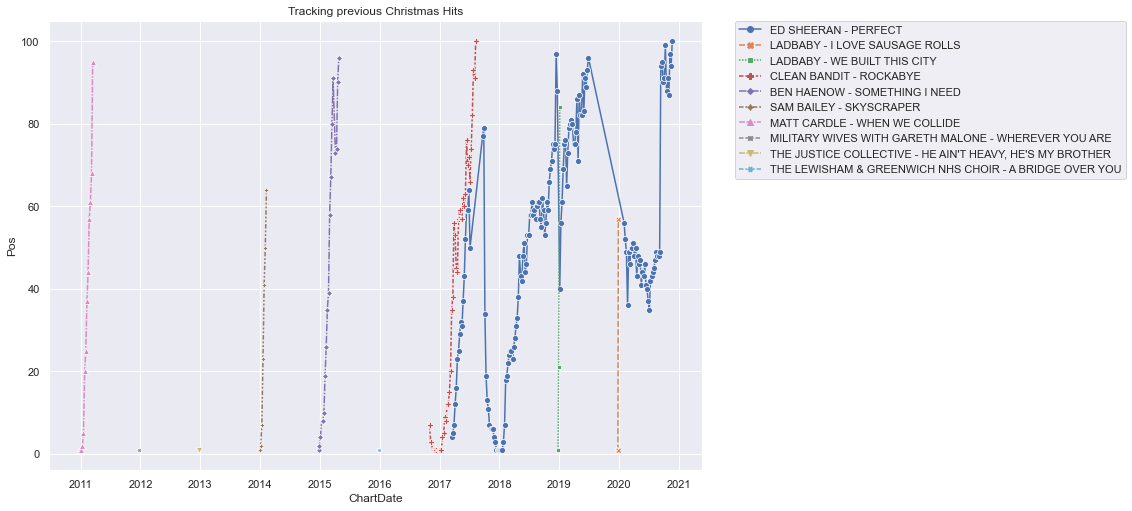

In [25]:
latesthits = df[(df["CHRISTMAS"])&(df["ChartYear"]>2009)]["ARTIST_AND_SONG"].unique()
df_latesthits = df[df["ARTIST_AND_SONG"].isin(latesthits)]

sns.lineplot(data = df_latesthits, x = "ChartDate", y = "Pos", style="ARTIST_AND_SONG", hue="ARTIST_AND_SONG", markers=True, )

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Tracking previous Christmas Hits")
plt.show()

"classics" tend to come back each year.

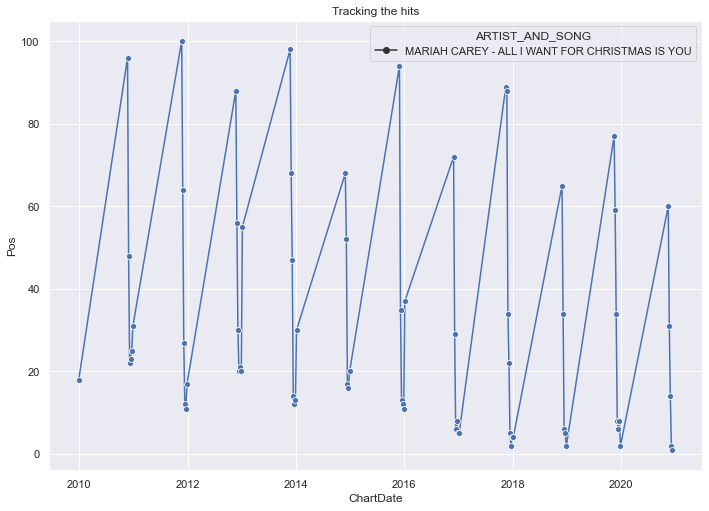

In [23]:
df_subset = df[df["ARTIST_AND_SONG"]=="MARIAH CAREY - ALL I WANT FOR CHRISTMAS IS YOU"]

sns.lineplot(data = df_subset, x = "ChartDate", y = "Pos", style="ARTIST_AND_SONG", markers=True)
plt.title("Tracking the hits")
plt.show()

There are a couple of tracks in the top 5 that have been growing over the years...

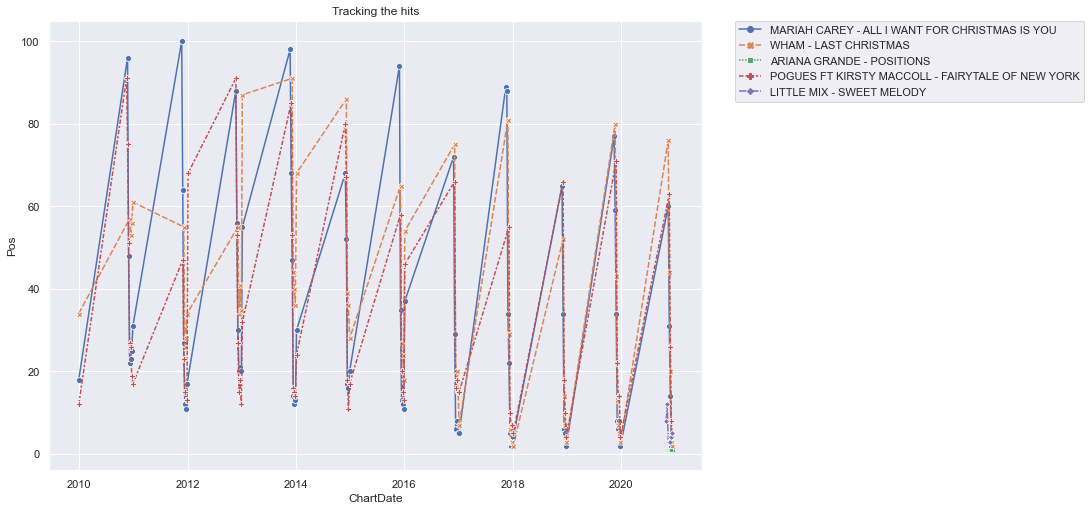

In [50]:
latesthits = df[(df["ChartDate"]==df["ChartDate"].max())]

latesthits = latesthits[(latesthits["Pos"]<6)]["ARTIST_AND_SONG"].unique()

df_latesthits = df[df["ARTIST_AND_SONG"].isin(latesthits)]

sns.lineplot(data = df_latesthits[df_latesthits["ChartDate"]>dt.datetime(2009,1,1)],
x = "ChartDate",
y = "Pos",
style="ARTIST_AND_SONG", hue="ARTIST_AND_SONG", markers=True, )

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Tracking the hits")
plt.show()

# Basic Model

In [206]:
data = df.replace("New", np.nan).replace("Re", np.nan).dropna()

data = data.sort_values("ChartDate") # to stop cross contamination

X = data[["LW", "PeakPos", "WoC"]]

y = data["Pos"]

X.head()

,LW,PeakPos,WoC
56698,86,49.0,7.0
56622,36,23.0,2.0
56623,27,1.0,29.0
56624,22,1.0,11.0
56625,26,12.0,8.0


In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [246]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred = y_pred.round()

In [247]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE is {round(mae,2)}")

MAE is 8.3


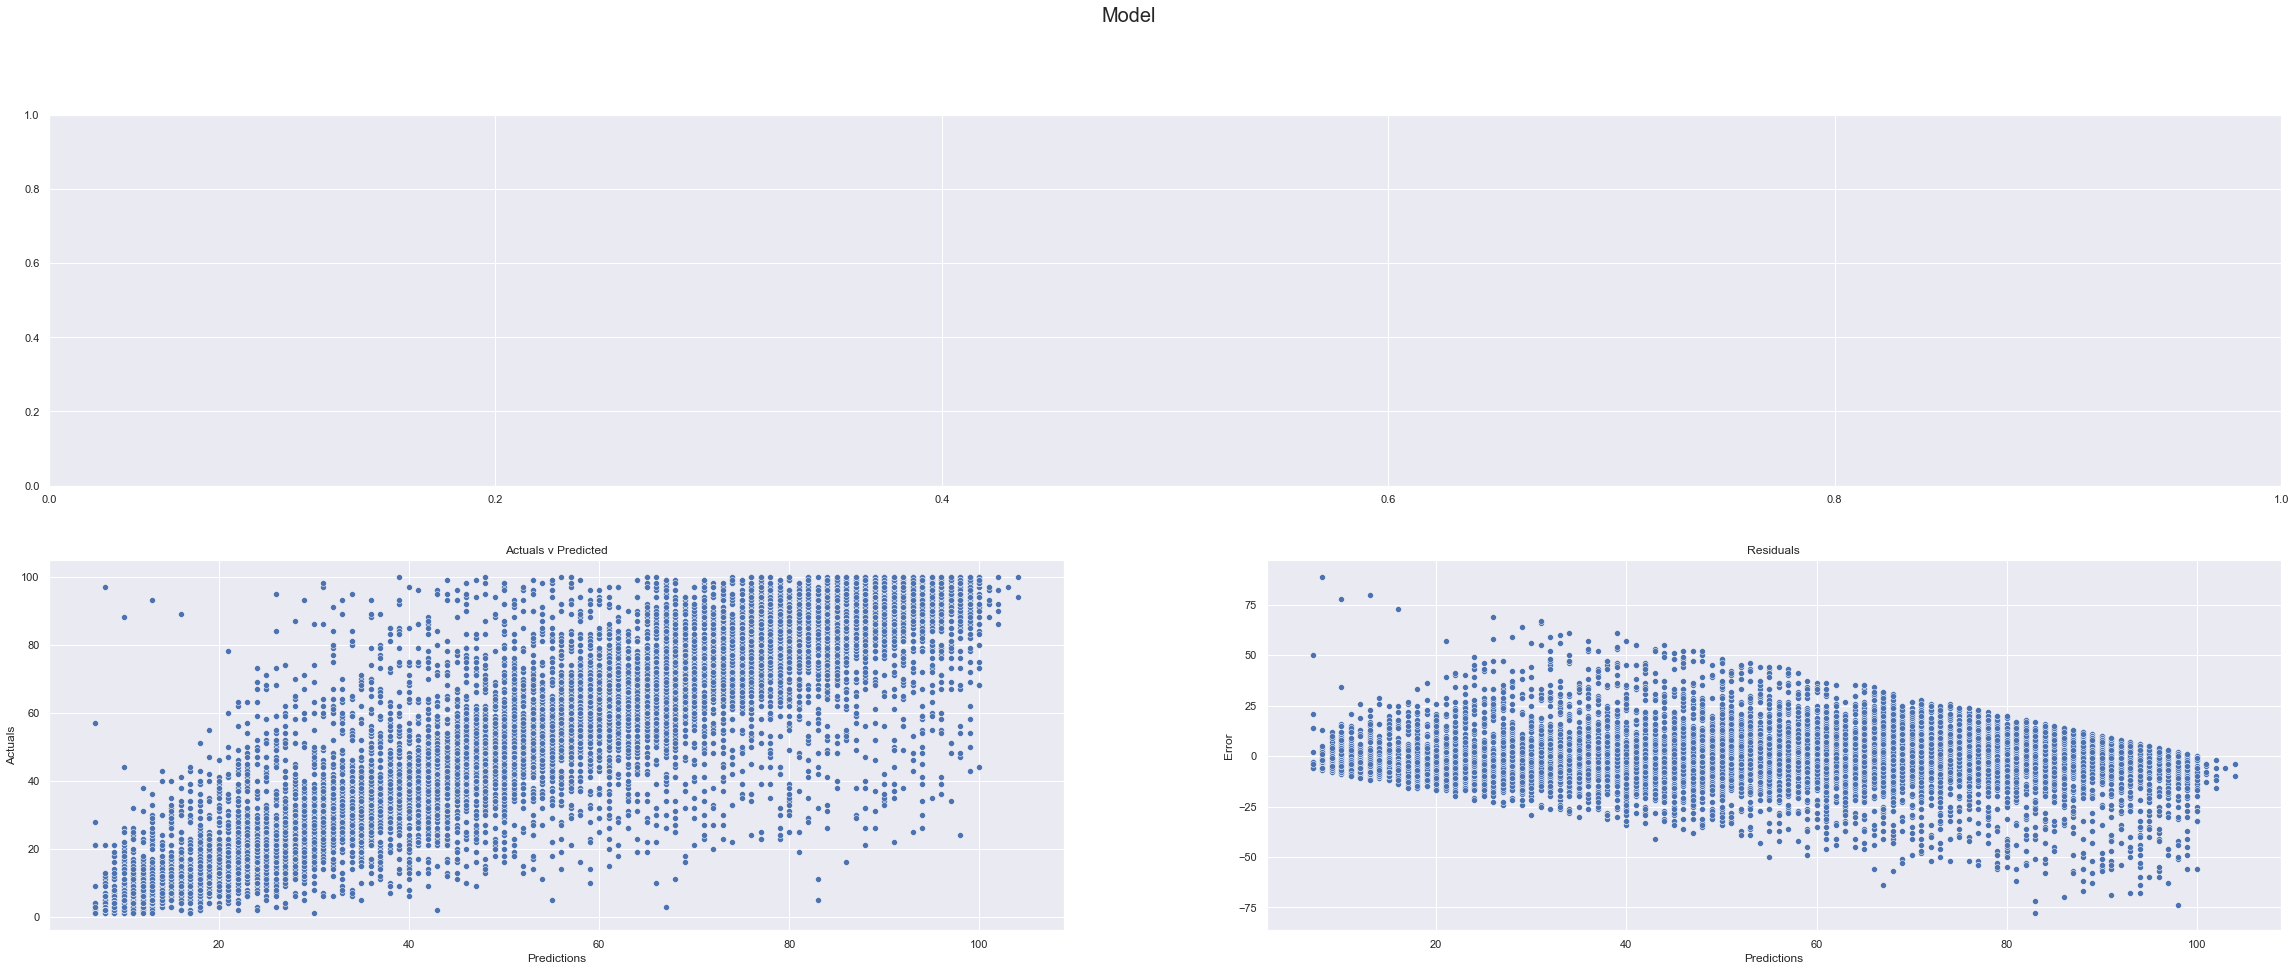

In [248]:
plot_results(y_pred, y_test)

In [229]:
mae = mean_absolute_error(y_test,  X_test["LW"].astype(int))

print(f"MAE is {round(mae, 2)}")

MAE is 8.04


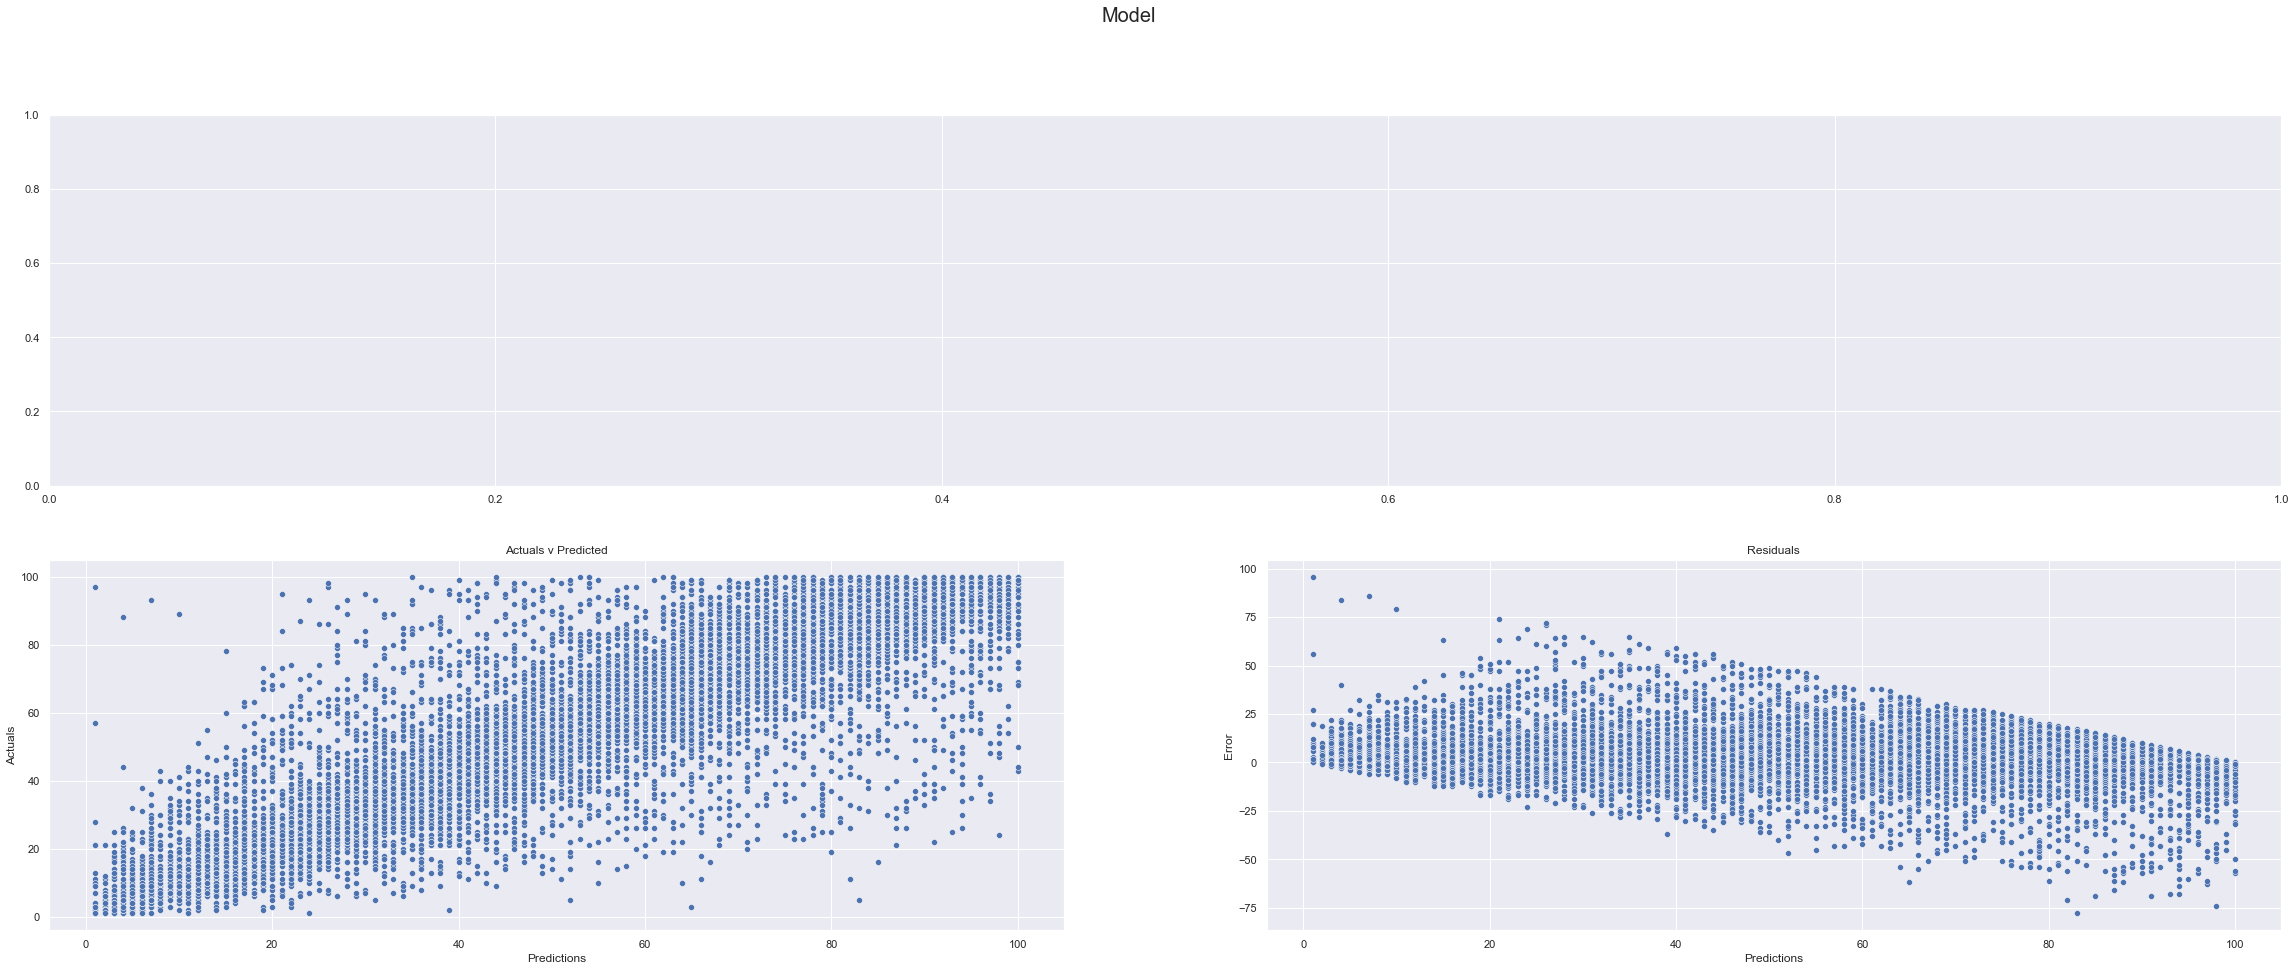

In [228]:
plot_results( X_test["LW"].astype(int),  y_test)

In [224]:
def plot_results(preds, actuals, title=f"Model", show_mae_plot=False):
    """
    Return nice plots for helping evaluate model namely:
    - prediction v time
    - residuals
    - prediction v actuals
    """

    resids = actuals - preds

    fig = plt.figure(constrained_layout=False, figsize=(40, 15))
    gs = fig.add_gridspec(nrows=2, ncols=2)
    ax1 = fig.add_subplot(gs[:-1, :])
    ax2 = fig.add_subplot(gs[-1, :-1])
    ax3 = fig.add_subplot(gs[-1, -1])

    #ax1.set_title("Actuals and Predictions over Time")
    #ax1.set_xlabel("Time")
    #ax1.plot(actuals, label="ACTUAL")
    #ax1.plot(resids, label="ERROR")
    #ax1.plot(resids.abs().rolling(30).mean(), label="Rolling Monthly MAE")
    #ax1.plot(preds, label="PREDICTED")

    ax2.set_title("Actuals v Predicted")
    ax2.set_xlabel("Predictions")
    ax2.set_ylabel("Actuals")
    sns.scatterplot(
        x=preds,
        y=actuals,
       # hue=results.index.year,
        ax=ax2,
    )

    ax3.set_title("Residuals")
    ax3.set_xlabel("Predictions")
    ax3.set_ylabel("Error")
    sns.scatterplot(
        x=preds,
        y=resids,
       #hue=results.index.year,
        ax=ax3,
    )

    fig.suptitle(f"{title}", fontsize=20)
    plt.show()

    return

# twitter

In [251]:
from textblob import TextBlob
import tweepy

class TwitterSongs():
    
    def __init__(self):
        twitterKeys = open('twitter_keys.txt', 'r').read().splitlines()
        apiKey = twitterKeys[0]
        apiSecret = twitterKeys[1]
        accessToken = twitterKeys[2]
        accessTokenSecret = twitterKeys[3]

        auth = tweepy.OAuthHandler(consumer_key=apiKey, consumer_secret=apiSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        self.api = tweepy.API(auth)
    
    def cleanTweet(self, tweet):
        cleansed = tweet.replace('RT', '')
        if cleansed.startswith(' @') or cleansed.startswith('@'):
            position = cleansed.index(' ')
            cleansed = cleansed[position+1:]
        return cleansed

    def printTweets(self, tweets):
        for i, tweet in enumerate(tweets):
            print('{}   #####################################\n{}\n\n'.format(i,cleanTweet(tweet.text)))

    def getTweets(self, searchTerm):
        maxTweets = 1000
        response = tweepy.Cursor(self.api.search, q=searchTerm, lang='en').items(maxTweets)
        tweets = [self.cleanTweet(tweet.text) for tweet in response]
        return tweets

    def sentiment(self, tweets):
        numTweets = len(tweets)
        if numTweets == 0:
            return 0
        polarity = 0
        for i, tweet in enumerate(tweets):
            tb = TextBlob(self.cleanTweet(tweet))
            polarity += tb.polarity
        return polarity / numTweets

In [252]:
shortlist = df[df["ChartDate"]==df["ChartDate"].max()]["ARTIST_AND_SONG"].unique()

In [253]:
tweetCount = {}
tweetSentiment = {}
ts = TwitterSongs()
for song in shortlist:
    print(song)
    tweets = ts.getTweets(song)
    tweetCount[song] = len(tweets)
    tweetSentiment[song] = ts.sentiment(tweets)

MARIAH CAREY - ALL I WANT FOR CHRISTMAS IS YOU


TweepError: Twitter error response: status code = 429